In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(font_scale=1.25)
np.random.seed(5)

pd.set_option("display.max_rows",10000)
pd.set_option("display.max_columns",100)

In [2]:
df = pd.read_csv("combine1.csv")

In [3]:
df.head()

,unique_key,created_date,complaint_type,location_type,incident_zip,incident_address,street_name,address_type,city,status,resolution_description,borough_left,latitude_left,longitude_left,borough_right,lot,zipcode,address,lotarea,bldgarea,comarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar,latitude_right,longitude_right
0,45538988,2020-02-03T05:53:31.000,1,RESIDENTIAL BUILDING,10461.0,1185 NEILL AVENUE,NEILL AVENUE,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.855078,-73.852492,BX,72.0,10466.0,4031 ELY AVENUE,1629.0,1584.0,0.0,1152.0,0.0,0.0,1.0,2.0,90.50,32.0,1950.0,0.0,0.97,0.75,0.0,2.0,40.890608,-73.845925
1,45539035,2020-02-03T06:54:49.000,1,RESIDENTIAL BUILDING,10463.0,3150 BAILEY AVENUE,BAILEY AVENUE,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.878790,-73.901771,BX,33.0,10469.0,1006 EAST GUN HILL ROAD,2500.0,3933.0,1337.0,2596.0,0.0,1337.0,1.0,3.0,100.00,60.0,1938.0,0.0,1.57,3.00,0.0,3.0,40.874358,-73.857873
2,45539982,2020-02-03T12:31:16.000,1,RESIDENTIAL BUILDING,10455.0,520 TINTON AVENUE,TINTON AVENUE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.812037,-73.906544,BX,3.0,10466.0,1804 BUSSING AVENUE,3034.0,1462.0,0.0,1462.0,0.0,0.0,1.0,2.5,93.58,43.0,1930.0,0.0,0.48,0.75,0.0,2.0,40.894086,-73.848477
3,45539193,2020-02-03T17:49:22.000,0,RESIDENTIAL BUILDING,10458.0,499 EAST 188 STREET,EAST 188 STREET,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.858104,-73.890006,BX,14.0,10461.0,1528 MCDONALD STREET,2500.0,2133.0,0.0,1512.0,0.0,0.0,1.0,2.0,100.00,37.0,1953.0,0.0,0.85,0.75,0.0,2.0,40.855071,-73.842963
4,45539989,2020-02-03T17:25:12.000,1,RESIDENTIAL BUILDING,10460.0,2112 MAPES AVENUE,MAPES AVENUE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.846939,-73.885253,BX,92.0,10465.0,4014 EAST TREMONT AVENUE,2025.0,2764.0,0.0,2764.0,0.0,0.0,1.0,3.0,100.00,52.0,1974.0,0.0,1.36,0.50,0.0,1.0,40.819990,-73.818189


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 36 columns):
unique_key                13354 non-null int64
created_date              13354 non-null object
complaint_type            13354 non-null int64
location_type             13354 non-null object
incident_zip              13354 non-null float64
incident_address          13354 non-null object
street_name               13354 non-null object
address_type              13354 non-null object
city                      13354 non-null object
status                    13354 non-null object
resolution_description    13354 non-null object
borough_left              13354 non-null object
latitude_left             13354 non-null float64
longitude_left            13354 non-null float64
borough_right             13354 non-null object
lot                       13354 non-null float64
zipcode                   13354 non-null float64
address                   13354 non-null object
lotarea                 

In [5]:
df['location_type'].value_counts()

RESIDENTIAL BUILDING    13354
Name: location_type, dtype: int64

In [6]:
df['street_name'].value_counts()

GRAND CONCOURSE                   603
TIEBOUT AVENUE                    484
MORRIS AVENUE                     231
WALTON AVENUE                     189
CRESTON AVENUE                    174
SEDGWICK AVENUE                   154
DECATUR AVENUE                    154
SHERIDAN AVENUE                   138
ANDERSON AVENUE                   135
DR M L KING JR BOULEVARD          128
VALENTINE AVENUE                  126
BRONX BOULEVARD                   119
DAVIDSON AVENUE                   118
GERARD AVENUE                     116
UNIVERSITY AVENUE                 115
WEBB AVENUE                       109
GRAND AVENUE                      104
STRATFORD AVENUE                  102
BRONXDALE AVENUE                  102
WALLACE AVENUE                    102
PROSPECT AVENUE                    97
HOLLAND AVENUE                     93
WHITE PLAINS ROAD                  92
CARPENTER AVENUE                   90
EAST  163 STREET                   85
CLAY AVENUE                        84
TINTON AVENU

In [7]:
df['address_type'].value_counts()

ADDRESS    13354
Name: address_type, dtype: int64

In [8]:
df['status'].value_counts()

Closed    11922
Open       1432
Name: status, dtype: int64

In [9]:
df['lot'].value_counts()

1.0       337
15.0      197
26.0      186
20.0      182
12.0      181
7.0       180
24.0      179
22.0      175
14.0      173
25.0      172
23.0      172
17.0      171
16.0      171
35.0      170
28.0      169
8.0       165
29.0      164
10.0      164
21.0      163
30.0      162
19.0      162
18.0      161
40.0      161
11.0      159
27.0      158
36.0      158
38.0      156
45.0      155
42.0      154
6.0       152
33.0      151
13.0      150
37.0      150
46.0      146
31.0      145
32.0      144
39.0      144
50.0      144
43.0      142
34.0      142
5.0       142
9.0       142
4.0       141
3.0       134
49.0      132
41.0      127
48.0      127
44.0      126
55.0      124
51.0      124
52.0      121
54.0      118
53.0      116
47.0      114
57.0      111
56.0      110
62.0      108
58.0      107
60.0      107
59.0      107
2.0       105
64.0      101
61.0      101
63.0       97
65.0       89
68.0       87
70.0       80
67.0       78
74.0       69
69.0       68
72.0       63
73.0  

In [10]:
df['yearbuilt'].value_counts()

1920.0    1234
1925.0     958
1930.0     908
1950.0     760
1960.0     715
1940.0     591
1910.0     567
1901.0     563
1955.0     557
1931.0     514
1935.0     387
1965.0     385
1945.0     265
1915.0     251
1970.0     248
1899.0     224
1928.0     168
1927.0     166
2006.0     136
1926.0     133
2005.0     128
2002.0     113
1992.0     111
2004.0     104
2001.0     100
2003.0      99
2007.0      96
1924.0      92
2000.0      91
1905.0      91
1993.0      88
2008.0      84
1929.0      82
1991.0      82
1999.0      75
1997.0      73
1988.0      71
1995.0      70
1987.0      70
1975.0      68
1989.0      60
1990.0      54
1998.0      47
1994.0      43
1959.0      43
1923.0      40
1985.0      38
1996.0      38
1961.0      38
1913.0      37
1932.0      35
1900.0      33
1964.0      32
1922.0      32
2009.0      32
1956.0      32
1953.0      31
2014.0      31
1957.0      31
1948.0      29
1916.0      29
1912.0      28
1911.0      28
1938.0      28
1937.0      27
2011.0      27
1963.0    

In [11]:
df['yearalter1'].value_counts()

0.0       12314
2000.0       56
2007.0       52
2001.0       51
1999.0       45
2003.0       43
2014.0       40
2005.0       38
1994.0       38
2017.0       36
2006.0       35
1996.0       34
1992.0       33
1998.0       33
2004.0       33
2002.0       30
2016.0       30
1991.0       30
2008.0       26
2009.0       24
2015.0       22
2018.0       22
1997.0       21
2011.0       19
1995.0       19
1993.0       18
2019.0       17
2013.0       15
1990.0       15
1986.0       13
1982.0       13
1989.0       12
2010.0       12
1987.0       10
1983.0       10
2012.0        9
1988.0        8
1985.0        7
1980.0        6
1979.0        5
1977.0        5
1984.0        5
1972.0        5
1967.0        5
1973.0        3
1981.0        3
1976.0        3
1969.0        3
1975.0        2
1974.0        2
1978.0        2
1960.0        2
1962.0        2
1968.0        2
1955.0        2
1958.0        2
1961.0        2
1970.0        1
1949.0        1
1942.0        1
1926.0        1
1931.0        1
1965.0  

In [12]:
#Remove unnecessary features
df.drop(['unique_key','created_date','location_type','incident_address','address_type',
         'city','resolution_description','borough_left','latitude_left','longitude_left',
         'borough_right','zipcode','address','yearalter1','latitude_right','longitude_right'],axis=1,inplace=True)

In [13]:
df.head()

,complaint_type,incident_zip,street_name,status,lot,lotarea,bldgarea,comarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,builtfar,residfar,commfar,facilfar
0,1,10461.0,NEILL AVENUE,Closed,72.0,1629.0,1584.0,0.0,1152.0,0.0,0.0,1.0,2.0,90.50,32.0,1950.0,0.97,0.75,0.0,2.0
1,1,10463.0,BAILEY AVENUE,Closed,33.0,2500.0,3933.0,1337.0,2596.0,0.0,1337.0,1.0,3.0,100.00,60.0,1938.0,1.57,3.00,0.0,3.0
2,1,10455.0,TINTON AVENUE,Open,3.0,3034.0,1462.0,0.0,1462.0,0.0,0.0,1.0,2.5,93.58,43.0,1930.0,0.48,0.75,0.0,2.0
3,0,10458.0,EAST 188 STREET,Open,14.0,2500.0,2133.0,0.0,1512.0,0.0,0.0,1.0,2.0,100.00,37.0,1953.0,0.85,0.75,0.0,2.0
4,1,10460.0,MAPES AVENUE,Open,92.0,2025.0,2764.0,0.0,2764.0,0.0,0.0,1.0,3.0,100.00,52.0,1974.0,1.36,0.50,0.0,1.0


In [14]:
#Save to csv
#df.to_csv("final1.csv",index=False)

In [15]:
df1 = pd.read_csv("final1.csv")

In [16]:
df1

,complaint_type,incident_zip,street_name,status,lot,lotarea,bldgarea,comarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,builtfar,residfar,commfar,facilfar
0,1,10461.0,NEILL AVENUE,Closed,72.0,1629.0,1584.0,0.0,1152.0,0.0,0.0,1.0,2.0,90.50,32.00,1950.0,0.97,0.75,0.0,2.0
1,1,10463.0,BAILEY AVENUE,Closed,33.0,2500.0,3933.0,1337.0,2596.0,0.0,1337.0,1.0,3.0,100.00,60.00,1938.0,1.57,3.00,0.0,3.0
2,1,10455.0,TINTON AVENUE,Open,3.0,3034.0,1462.0,0.0,1462.0,0.0,0.0,1.0,2.5,93.58,43.00,1930.0,0.48,0.75,0.0,2.0
3,0,10458.0,EAST 188 STREET,Open,14.0,2500.0,2133.0,0.0,1512.0,0.0,0.0,1.0,2.0,100.00,37.00,1953.0,0.85,0.75,0.0,2.0
4,1,10460.0,MAPES AVENUE,Open,92.0,2025.0,2764.0,0.0,2764.0,0.0,0.0,1.0,3.0,100.00,52.00,1974.0,1.36,0.50,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,1,10472.0,WHEELER AVENUE,Closed,80.0,1638.0,1690.0,0.0,1690.0,0.0,0.0,1.0,3.0,91.00,35.00,1950.0,1.03,1.25,0.0,2.0
13350,1,10457.0,MT HOPE PLACE,Closed,40.0,6730.0,28279.0,0.0,28279.0,0.0,0.0,1.0,6.0,67.25,55.00,1923.0,4.20,3.44,0.0,4.8
13351,1,10472.0,FTELEY AVENUE,Closed,158.0,1741.0,2340.0,0.0,2340.0,0.0,0.0,1.0,3.0,92.72,40.00,1992.0,1.34,3.44,0.0,4.8
13352,1,10459.0,REV JAMES POLITE AVENUE,Closed,19.0,1764.0,2016.0,0.0,2016.0,0.0,0.0,1.0,3.0,98.00,36.42,1960.0,1.14,0.75,0.0,2.0


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 20 columns):
complaint_type    13354 non-null int64
incident_zip      13354 non-null float64
street_name       13354 non-null object
status            13354 non-null object
lot               13354 non-null float64
lotarea           13354 non-null float64
bldgarea          13354 non-null float64
comarea           13354 non-null float64
resarea           13354 non-null float64
officearea        13354 non-null float64
retailarea        13354 non-null float64
numbldgs          13354 non-null float64
numfloors         13354 non-null float64
lotdepth          13354 non-null float64
bldgdepth         13354 non-null float64
yearbuilt         13354 non-null float64
builtfar          13354 non-null float64
residfar          13354 non-null float64
commfar           13354 non-null float64
facilfar          13354 non-null float64
dtypes: float64(17), int64(1), object(2)
memory usage: 2.0+ MB


### Target is Complaint Type, perform Visualization

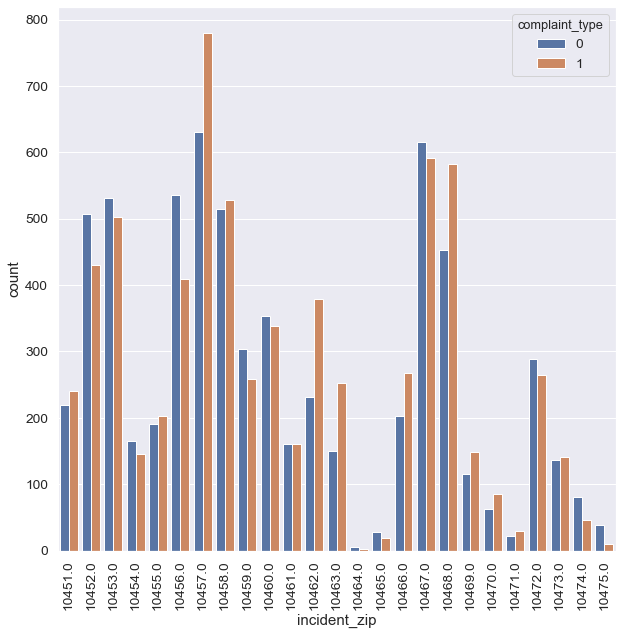

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(x='incident_zip',hue='complaint_type',data=df1)
plt.xticks(rotation=90)
plt.show()

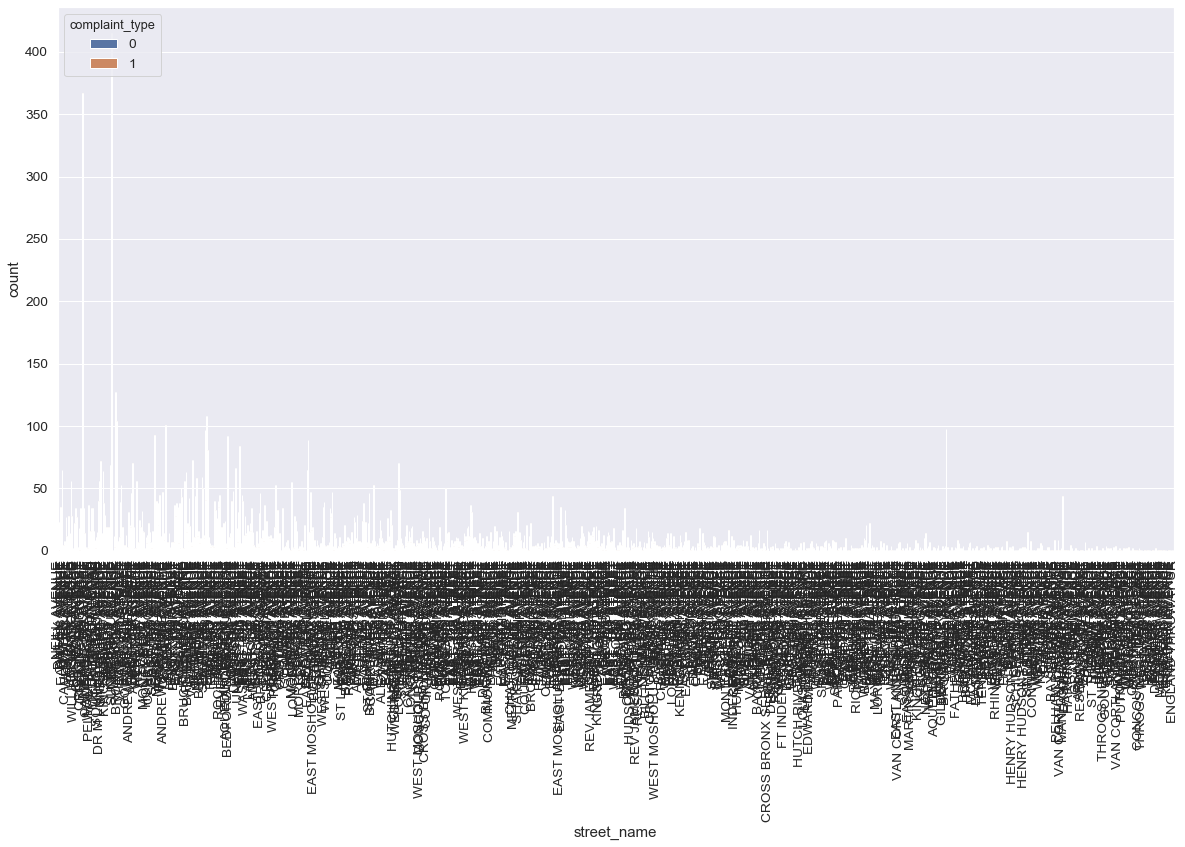

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x='street_name',hue='complaint_type',data=df1)
plt.xticks(rotation=90)
plt.show()

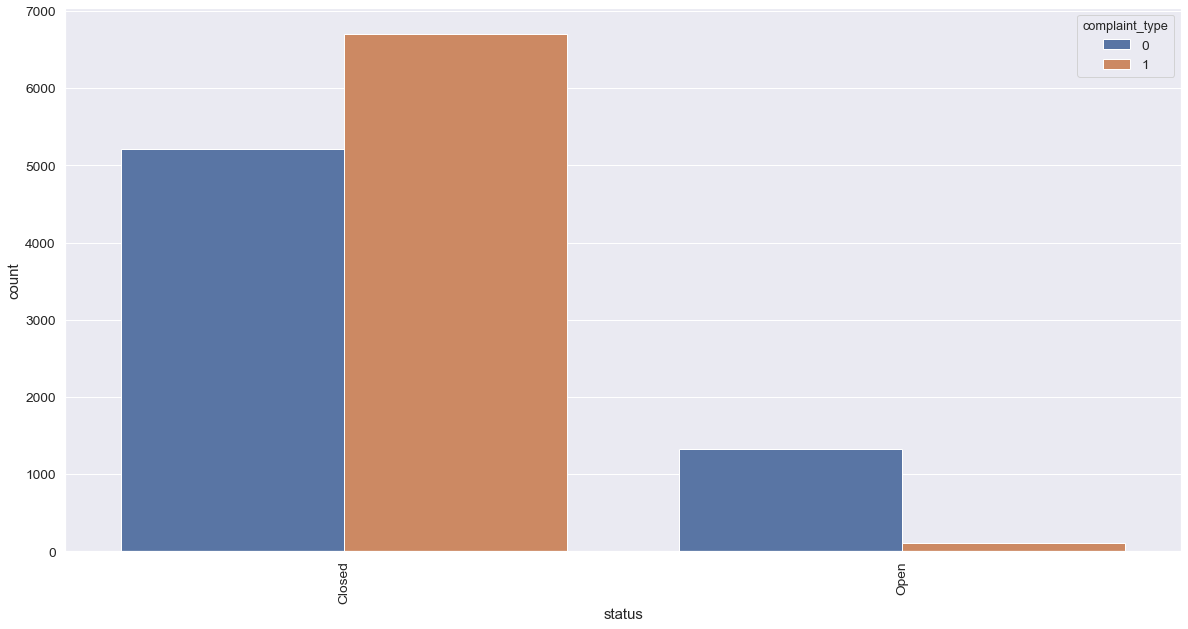

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(x='status',hue='complaint_type',data=df1)
plt.xticks(rotation=90)
plt.show()

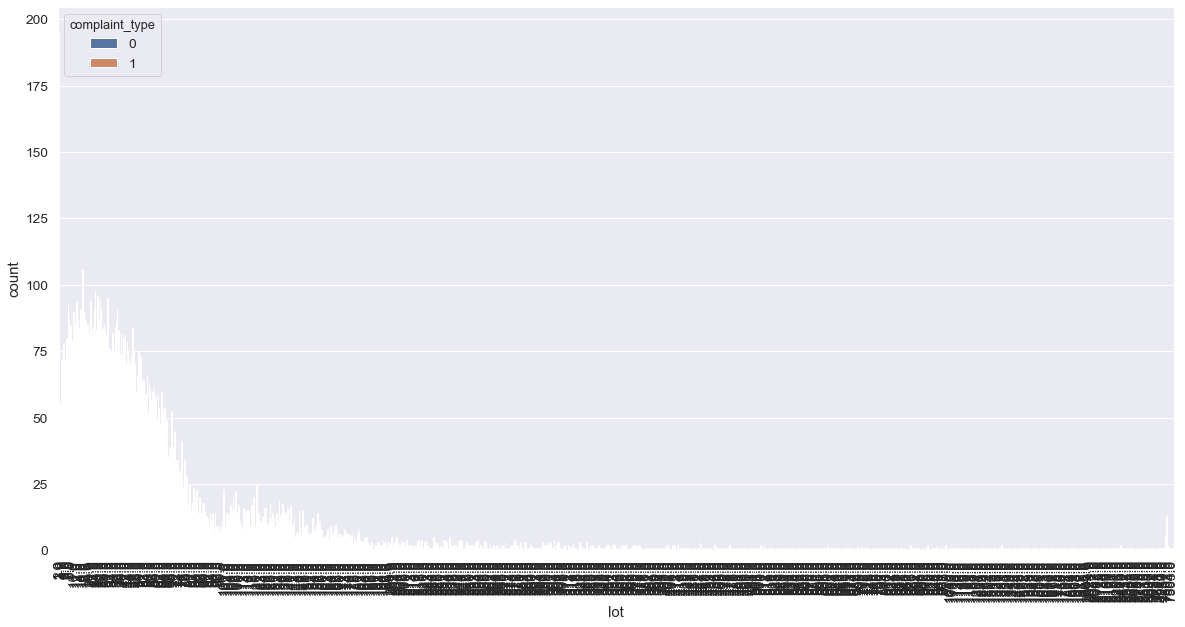

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(x='lot',hue='complaint_type',data=df1)
plt.xticks(rotation=90)
plt.show()

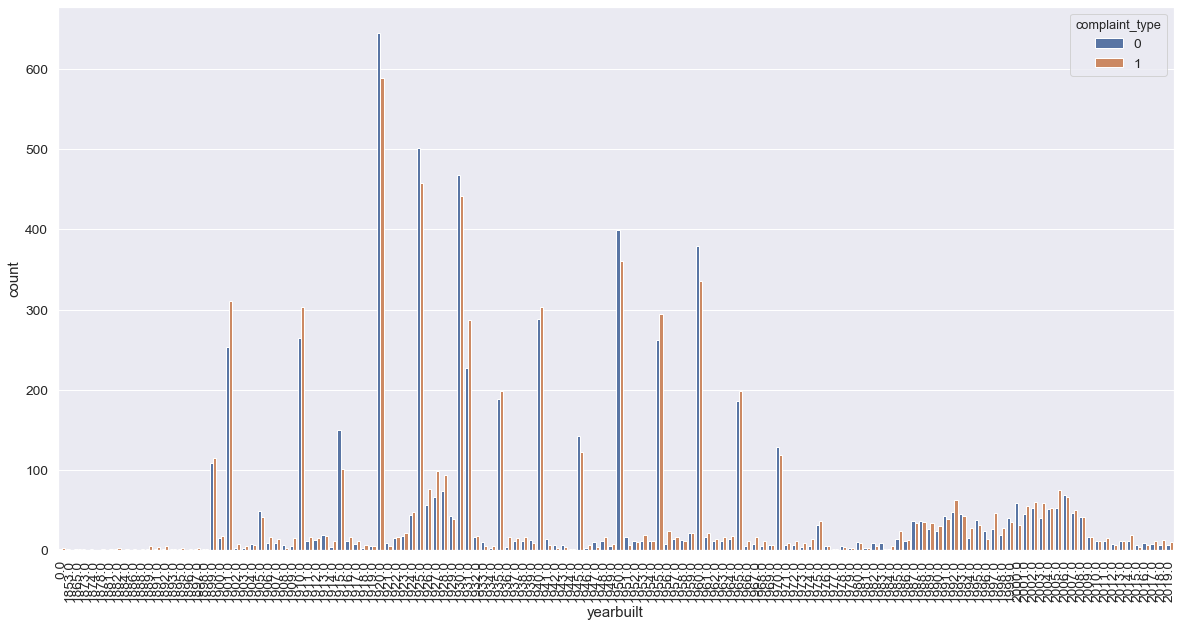

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(x='yearbuilt',hue='complaint_type',data=df1)
plt.xticks(rotation=90)
plt.show()

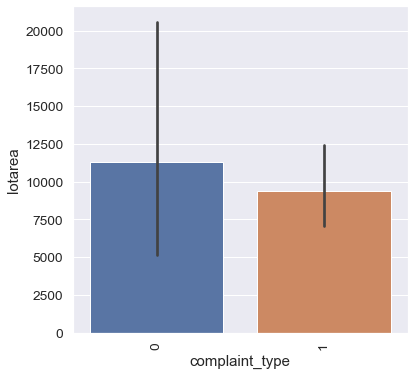

In [23]:
plt.figure(figsize=(6,6))
sns.barplot(x='complaint_type',y='lotarea',data=df1)
plt.xticks(rotation=90)
plt.show()

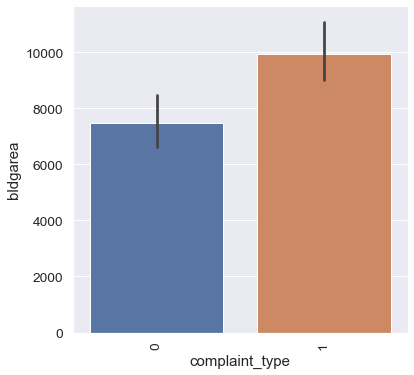

In [24]:
plt.figure(figsize=(6,6))
sns.barplot(x='complaint_type',y='bldgarea',data=df1)
plt.xticks(rotation=90)
plt.show()

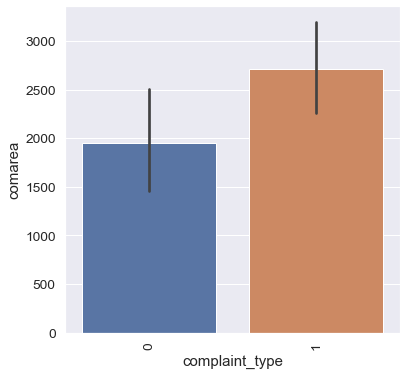

In [25]:
plt.figure(figsize=(6,6))
sns.barplot(x='complaint_type',y='comarea',data=df1)
plt.xticks(rotation=90)
plt.show()

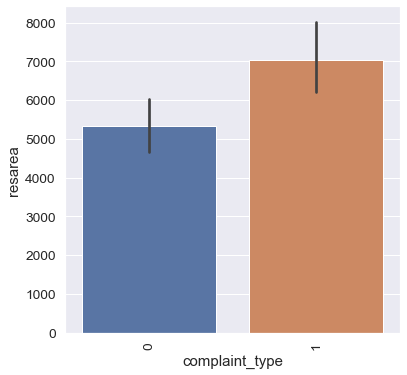

In [26]:
plt.figure(figsize=(6,6))
sns.barplot(x='complaint_type',y='resarea',data=df1)
plt.xticks(rotation=90)
plt.show()

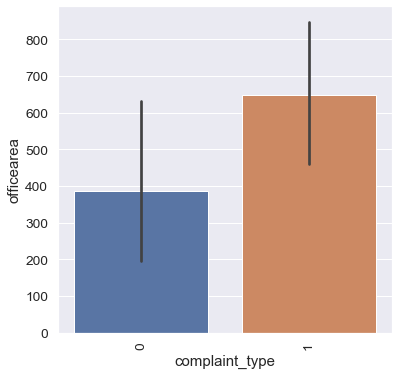

In [27]:
plt.figure(figsize=(6,6))
sns.barplot(x='complaint_type',y='officearea',data=df1)
plt.xticks(rotation=90)
plt.show()

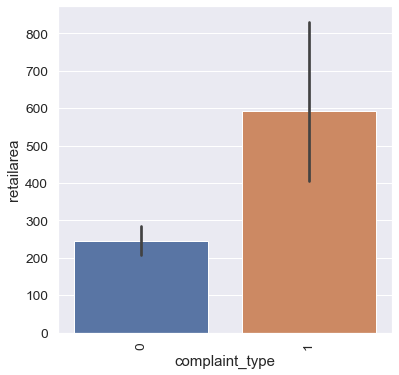

In [28]:
plt.figure(figsize=(6,6))
sns.barplot(x='complaint_type',y='retailarea',data=df1)
plt.xticks(rotation=90)
plt.show()

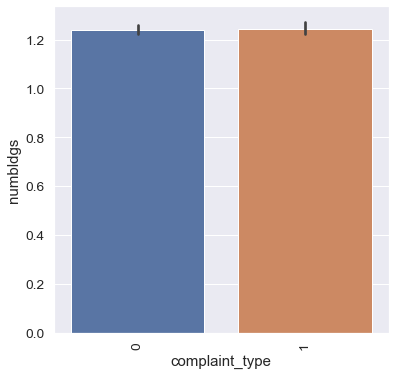

In [29]:
plt.figure(figsize=(6,6))
sns.barplot(x='complaint_type',y='numbldgs',data=df1)
plt.xticks(rotation=90)
plt.show()

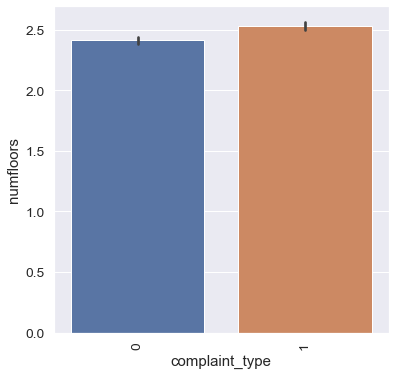

In [30]:
plt.figure(figsize=(6,6))
sns.barplot(x='complaint_type',y='numfloors',data=df1)
plt.xticks(rotation=90)
plt.show()

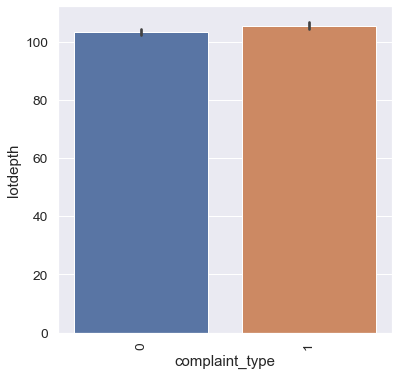

In [31]:
plt.figure(figsize=(6,6))
sns.barplot(x='complaint_type',y='lotdepth',data=df1)
plt.xticks(rotation=90)
plt.show()

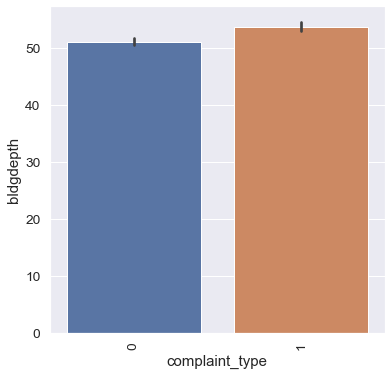

In [32]:
plt.figure(figsize=(6,6))
sns.barplot(x='complaint_type',y='bldgdepth',data=df1)
plt.xticks(rotation=90)
plt.show()

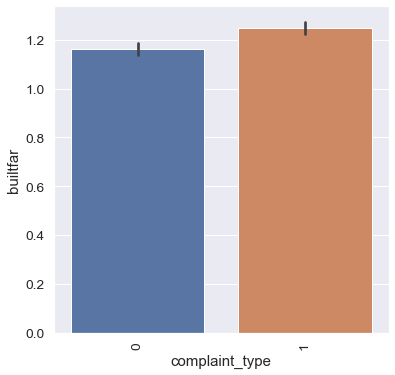

In [33]:
plt.figure(figsize=(6,6))
sns.barplot(x='complaint_type',y='builtfar',data=df1)
plt.xticks(rotation=90)
plt.show()